In [1]:
import random
import tensorflow as tf
import math
from IPython import display

In [2]:
from res.plot_lib import plot_data, plot_model, set_default

In [3]:
set_default()

In [4]:
seed = 12345
random.seed(seed)
tf.random.set_seed(seed)
N = 1000
D = 2
C = 5
H = 100

In [5]:
X = tf.Variable(tf.zeros((N * C, D), dtype=tf.dtypes.float64))
y = tf.Variable(tf.zeros((N * C), dtype=tf.dtypes.int64))
for c in range(C):
    index = 0;
    t = tf.linspace(0, 1, N)
    inner_var = tf.linspace(
    (2* math.pi / C) * (c),
    (2 * math.pi / C) * (2 + c),
        N
    ) + tf.random.uniform(shape=[N]) * 0.2
    for ix in range(N * c, N * (c + 1)):
        temp = t[index] * tf.constant((
            math.sin(inner_var[index]), math.cos(inner_var[index])), 
            dtype=tf.dtypes.float64)
        X[ix].assign(temp)
        y[ix].assign(c)
        index += 1
        

In [16]:
print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (5000, 2)
y: (5000,)


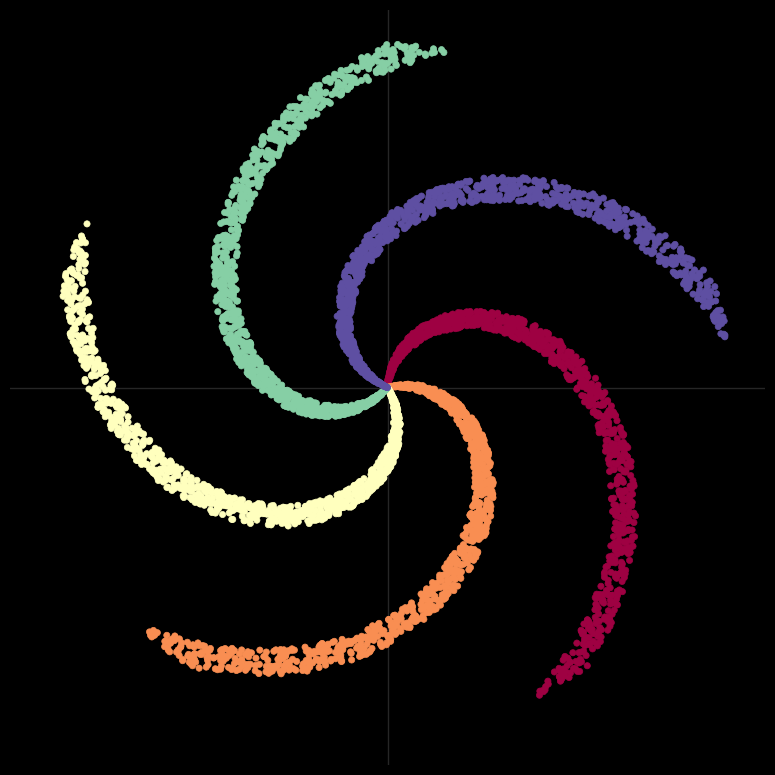

In [6]:
plot_data(X, y)

### Linear Model

In [7]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = H, input_shape = (D,)),
    tf.keras.layers.Dense(units = C)
])

criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

for t in range(1000):
    
    # Feed forward to get the logits
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = criterion(y, y_pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Compute the loss and accuracy
    
    predicted = tf.argmax(y_pred, axis=-1)
    print(predicted)
    acc = (y == predicted).numpy().sum() / y.shape[0]
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.numpy(), acc))
    display.clear_output(wait=True)
    

tf.Tensor([0 4 4 ... 0 0 0], shape=(5000,), dtype=int64)
[EPOCH]: 999, [LOSS]: 0.813140, [ACCURACY]: 0.497


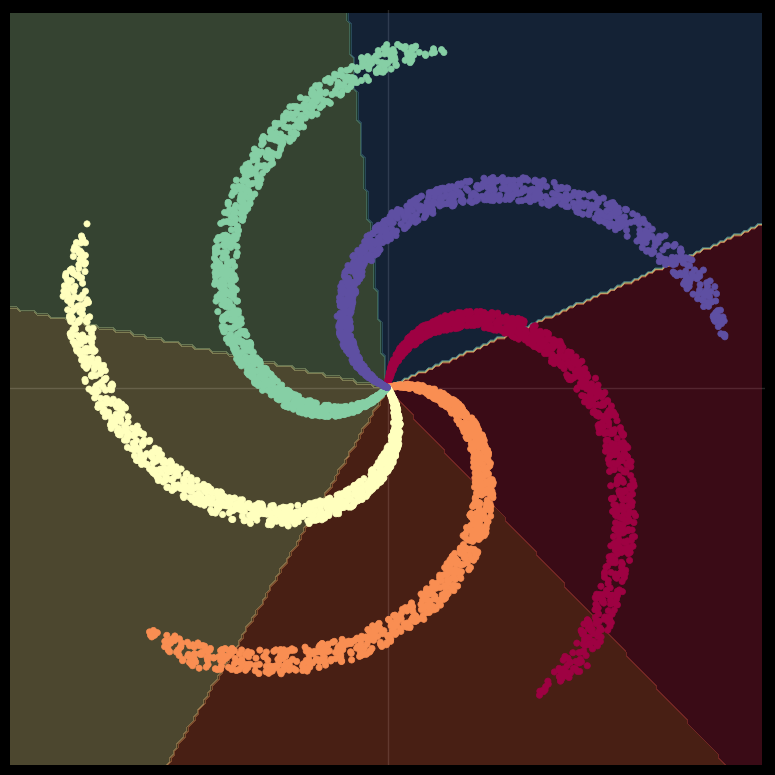

In [37]:

# Plot trained model
print(model)
plot_model(X, y, model)

### Two-layered network

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = H, input_shape = (D,)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units = C)
])

criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

for t in range(1000):
    
    # Feed forward to get the logits
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = criterion(y, y_pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Compute the loss and accuracy
    
    predicted = tf.argmax(y_pred, axis=-1)
    print(predicted)
    acc = (y == predicted).numpy().sum() / y.shape[0]
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.numpy(), acc))
    display.clear_output(wait=True)
    

tf.Tensor([0 0 0 ... 4 4 4], shape=(5000,), dtype=int64)
[EPOCH]: 999, [LOSS]: 0.284687, [ACCURACY]: 0.894


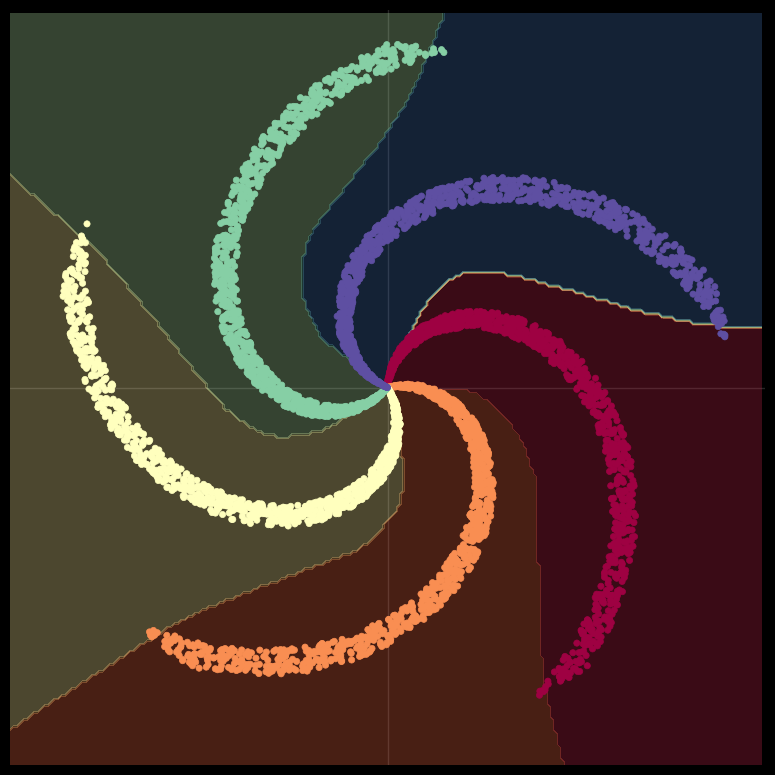

In [34]:

# Plot trained model
print(model)
plot_model(X, y, model)